In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("data_hous.csv")
df_test = pd.read_csv("test_data_hous.csv")



In [7]:
X = df_test[['srf_de_vie','chambres','qual_global',"srf_de_vie15"]]
y = df_test['prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

model = LinearRegression()

scores = cross_val_score(model, X_train_min_max, y_train, cv=5)

print(scores)
print(scores.mean())




[0.55186618 0.53987643 0.53056426 0.53690793 0.53415616]
0.5386741921154348


In [8]:
X = df_test[['srf_de_vie','chambres','qual_global',"srf_de_vie15"]]
y = df_test['prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

model = KNeighborsRegressor(n_neighbors=13)

scores = cross_val_score(model, X_train_min_max, y_train, cv=5)

print(scores)
print(scores.mean())


[0.60736215 0.58381268 0.57422141 0.59914585 0.59174675]
0.5912577662643765


0.8510400131740632

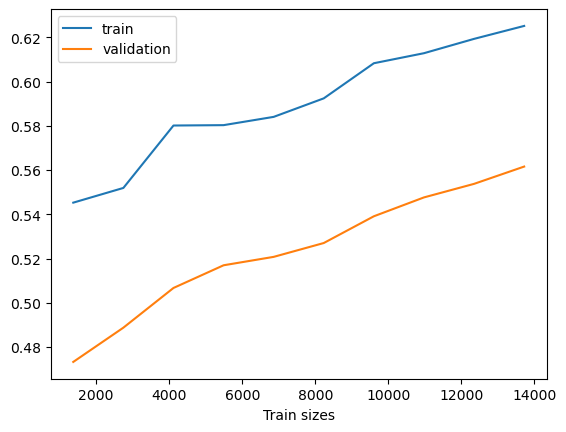

In [9]:
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","qual_global", "qual_vue","lat",'long',"vue_mer","sd_bain"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)


minmax = MinMaxScaler()
knn12 = KNeighborsRegressor(weights='distance', n_neighbors=12)

pipe = Pipeline([
     ('minmax', minmax),
     ('knn', knn12)
])

trained_pipe = pipe.fit(X_train,y_train)
trained_pipe.predict(X_test)


N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0,10), cv=5)
plt.plot(N,train_score.mean(axis=1), label="train")
plt.plot(N,val_score.mean(axis=1), label = 'validation')
plt.xlabel("Train sizes")
plt.legend()

trained_pipe.score(X_test,y_test)
# with open('modele_knn.pkl', 'wb') as fichier:
#     pickle.dump(trained_pipe, fichier)

In [10]:
param_grid = {'n_neighbors': np.arange(1,100),
              'weights' : ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']})

In [11]:
grid.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [12]:
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","zipcode","qual_global","sd_bain","qual_vue"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

numeric_features = ["srf_de_vie","chambres", "sd_bain"]
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])
categorial_features = ["zipcode"]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = LinearRegression()

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('stdscaler',
                                                                   MinMaxScaler())]),
                                                  ['srf_de_vie', 'chambres',
                                                   'sd_bain']),
                                                 ('cat', OneHotEncoder(),
                                                  ['zipcode'])])),
                ('model', LinearRegression())])

In [13]:
pipe.predict(X_test)
pipe.score(X_test, y_test)

0.7958316845192757

In [14]:
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","zipcode","qual_global", "qual_vue", "sd_bain","vue_mer","srf_total"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

numeric_features = ["srf_de_vie", "chambres","sd_bain","vue_mer","srf_total"]
numeric_transformer = Pipeline([
    ('scaler', RobustScaler())
])
categorial_features = ["zipcode","qual_global","qual_vue"]
preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = Ridge(alpha=1) 

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])  

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)


0.8344684142967893

In [15]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0,10), cv=5)


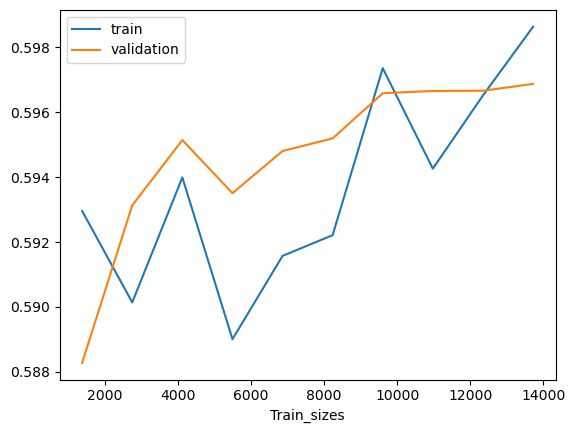

In [16]:
plt.plot(N,train_score.mean(axis=1), label="train")
plt.plot(N,val_score.mean(axis=1), label = 'validation')
plt.xlabel("Train_sizes")
plt.legend()

In [18]:
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","zipcode","qual_global", "qual_vue", "sd_bain","vue_mer","srf_total"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

numeric_features = ["srf_de_vie", "chambres", "sd_bain", "srf_total",]
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler())
])
categorial_features = ["zipcode", "qual_global", "qual_vue"]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)     
    ]
)

model = Lasso(alpha=1, fit_intercept=False, positive=True)
pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

trained_pipe = pipe.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)


0.8334189111639126